In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/california_housing_train.csv')

In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)
df.isna().sum()

/tmp/ipython-input-33-3685529444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
!pip install h2o

In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         32 mins 18 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    3 months and 9 days
H2O_cluster_name:           H2O_from_python_unknownUser_cc3bvk
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    2.950 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.11.13 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
train_df = h2o.H2OFrame(df)
train_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:17000
Cols:9

longitude           latitude           housing_median_age    total_rooms         total_bedrooms     population         households          median_income       median_house_value
-------  ------------------  -----------------  --------------------  ------------------  -----------------  -----------------  ------------------  ------------------  --------------------
type     real                real               int                   int                 int                int                int                 real                int
mins     -124.35             32.54              1.0                   2.0                 1.0                3.0                1.0                 0.4999              14999.0
mean     -119.5621082352941  35.62522470588239  28.589352941176436    2643.6644117647143  539.4108235294095  1429.573941176477  501.2219411764718   3.8835781000000016  207300.9123529415
maxs     -114.31             41.95              52.0                  37937.0             6445.0             35682.0            6082.0              15.0001             500001.0
sigma    2.0051664084260357  2.137339794657087  12.586936981660406    2179.9470714527765  421.4994515798648  1147.852959159527  384.52084085590155  1.9081565183791034  115983.76438720895
zeros    0                   0                  0                     0                   0                  0                  0                   0                   0
missing  0                   0                  0                     0                   0                  0                  0                   0                   0
0        -114.31             34.19              15.0                  5612.0              1283.0             1015.0             472.0               1.4936              66900.0
1        -114.47             34.4               19.0                  7650.0              1901.0             1129.0             463.0               1.82                80100.0
2        -114.56             33.69              17.0                  720.0               174.0              333.0              117.0               1.6509              85700.0
3        -114.57             33.64              14.0                  1501.0              337.0              515.0              226.0               3.1917              73400.0
4        -114.57             33.57              20.0                  1454.0              326.0              624.0              262.0               1.925               65500.0
5        -114.58             33.63              29.0                  1387.0              236.0              671.0              239.0               3.3438              74000.0
6        -114.58             33.61              25.0                  2907.0              680.0              1841.0             633.0               2.6768              82400.0
7        -114.59             34.83              41.0                  812.0               168.0              375.0              158.0               1.7083              48500.0
8        -114.59             33.61              34.0                  4789.0              1175.0             3134.0             1056.0              2.1782              58400.0
9        -114.6              34.83              46.0                  1497.0              309.0              787.0              271.0               2.1908              48100.0
[17000 rows x 9 columns]

In [ ]:
test = pd.read_csv('/content/california_housing_test.csv')
test = h2o.H2OFrame(test)

# Defining feature and label columns
x = test.columns
y = 'median_house_value'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl  function
aml = H2OAutoML(max_runtime_secs = 600,
                # exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
                balance_classes = False,
                project_name ='Project_1'
)
# Train model and record time % time
aml.train(x = x, y = y, training_frame = train_df)

AutoML progress: |
09:41:01.68: New models will be added to existing leaderboard Project_1@@median_house_value (leaderboard frame=null) with already 33 models.

███████
09:41:56.66: StackedEnsemble_BestOfFamily_5_AutoML_2_20250707_94101 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

███████████
09:43:47.916: StackedEnsemble_BestOfFamily_6_AutoML_2_20250707_94101 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
09:43:47.939: StackedEnsemble_AllModels_4_AutoM

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20250707_91158


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       11/26
# GBM base models (used / total)           5/10
# XGBoost base models (used / total)       6/10
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  0/3
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 767473248.6093858
RMSE: 27703.307539161924
MAE: 18884.627811706105
RMSLE: 0.1410694324080585
Mean Residual Deviance: 767473248.6093858
R^2: 0.9435628150737745
Null degrees of freedom: 10056
Residual degrees of freedom: 10045
Null deviance: 136762522909302.33
Residual deviance: 7718478461264.594
AIC: 234318.8124810902

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 2013854660.997773
RMSE: 44875.992033578186
MAE: 29368.02054417076
RMSLE: 0.22033689880319052
Mean Residual Deviance: 2013854660.997773
R^2: 0.8502870831954857
Null degrees of freedom: 16999
Residual degrees of freedom: 16988
Null deviance: 228735799781891.16
Residual deviance: 34235529236962.14
AIC: 412466.2900218574

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     82510.9      1050.87      82634.8       82708.6       83850.7       82450.8       80909.6
loglikelihood           0            0            0             0             0             0             0
mae                     29367.2      417.32       29427.2       29030.8       29377.6       30022         28978.7
mean_residual_deviance  2.01404e+09  9.21073e+07  1.97099e+09   1.93002e+09   2.00108e+09   2.1708e+09    1.99732e+09
mse                     2.01404e+09  9.21073e+07  1.97099e+09   1.93002e+09   2.00108e+09   2.1708e+09    1.99732e+09
null_deviance           4.57472e+13  1.49452e+12  4.47703e+13   4.54346e+13   4.60673e+13   4.81436e+13   4.432e+13
r2                      0.850252     0.00272747   0.849919      0.854655      0.849872      0.847121      0.849691
residual_deviance       6.84711e+12  3.075e+11    6.71712e+12   6.58909e+12   6.91575e+12   7.35251e+12   6.66107e+12
rmse                    44868.9      1014.9       44395.8       43932         44733.5       46591.9       44691.4
rmsle                   0.220311     0.00378677   0.213761      0.223045      0.221418      0.222688      0.220643

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id                                                    rmse          mse       mae       rmsle    mean_residual_deviance
------------------------------------------------------  --------  -----------  --------  ----------  ------------------------
StackedEnsemble_AllModels_3_AutoML_1_20250707_91158      44876    2.01385e+09   29368      0.220337               2.01385e+09
StackedEnsemble_AllModels_2_AutoML_1_20250707_91158      45093.1  2.03339e+09   29494.1    0.221225               2.03339e+09
StackedEnsemble_AllModels_1_AutoML_1_20250707_91158      45093.8  2.03345e+09   29498.8    0.221259               2.03345e+09
StackedEnsemble_BestOfFamily_2_AutoML_1_20250707_91158   45571.9  2.0768e+09    29913.2    0.224815               2.0768e+09
StackedEnsemble_BestOfFamily_8_AutoML_2_20250707_94101   45789.1  2.09665e+09   30116.5    0.224983               2.09665e+09
StackedEnsemble_BestOfFamily_4_AutoML_1_20250707_91158   45789.1  2.09665e+09   30116.5    0.224983               2.09665e+09
StackedEnsemble_BestOfFamily_3_AutoML_1_20250707_91158   45934.1  2.10994e+09   30319.1    0.226491               2.10994e+09
StackedEnsemble_BestOfFamily_1_AutoML_1_20250707_91158   46022    2.11802e+09   30492.5    0.228275               2.11802e+09
GBM_9_AutoML_2_20250707_94101                            46141.4  2.12903e+09   30517.2    0.227739               2.12903e+09
GBM_4_AutoML_1_20250707_91158                            46141.4  2.12903e+09   30517.2    0.227739               2.12903e+09
GBM_3_AutoML_1_20250707_91158                            46306.8  2.14432e+09   30633.4    0.227464               2.14432e+09
GBM_8_AutoML_2_20250707_94101                            46306.8  2.14432e+09   30633.4    0.227464               2.14432e+09
GBM_7_AutoML_2_20250707_94101                            46464    2.1589e+09    30839.8    0.229185               2.1589e+09
GBM_2_AutoML_1_20250707_91158                            46464    2.1589e+09    30839.8    0.229185               2.1589e+09
GBM_1_AutoML_1_20250707_91158                            46831    2.19314e+09   31360      0.233194               2.19314e+09
GBM_6_AutoML_2_20250707_94101                            46831    2.19314e+09   31360      0.233194               2.19314e+09
GBM_5_AutoML_1_20250707_91158                            47775.9  2.28254e+09   31747.6    0.235581               2.28254e+09
GBM_10_AutoML_2_20250707_94101                           47775.9  2.28254e+09   31747.6    0.235581               2.28254e+09
XGBoost_grid_2_AutoML_2_20250707_94101_model_3           48661.2  2.36791e+09   32500.8  nan                      2.36791e+09
XGBoost_grid_1_AutoML_1_20250707_91158_model_3           48661.2  2.36791e+09   32500.8  nan                      2.36791e+09
GBM_grid_2_AutoML_2_20250707_94101_model_2               48845.4  2.38587e+09   33117.1    0.241984               2.38587e+09
GBM_grid_1_AutoML_1_20250707_91158_model_2               48845.4  2.38587e+09   33117.1    0.241984               2.38587e+09
GBM_grid_2_AutoML_2_20250707_94101_model_4               49145.5  2.41528e+09   33726.7  nan                      2.41528e+09
XGBoost_grid_1_AutoML_1_20250707_91158_model_1           49347.4  2.43517e+09   33408.7  nan                      2.43517e+09
XGBoost_grid_2_AutoML_2_20250707_94101_model_1           49347.4  2.43517e+09   33408.7  nan                      2.43517e+09
XGBoost_grid_2_AutoML_2_20250707_94101_model_7           49364.1  2.43681e+09   33474.8    0.247001               2.43681e+09
GBM_grid_1_AutoML_1_20250707_91158_model_3               49375.4  2.43793e+09   33662.2  nan                      2.43793e+09
GBM_grid_2_AutoML_2_20250707_94101_model_3               49375.4  2.43793e+09   33662.2  nan                      2.43793e+09
GBM_grid_2_AutoML_2_20250707_94101_model_1               49443    2.44461e+09   34222.9    0.257013               2.44461e+09
GBM_grid_1_AutoML_1_20250707_91158_model_1               49443    2.44461e+09   34222.9    0.2570

In [ ]:
# Get the top model of leaderboard
se = aml.leader

# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name'])

# Baselearner models :
metalearner.varimp()

/usr/local/lib/python3.11/dist-packages/h2o/estimators/stackedensemble.py:965: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


[('GBM_3_AutoML_1_20250707_91158', 23234.78125, 1.0, 0.21439825598646953),
 ('GBM_4_AutoML_1_20250707_91158',
  21459.20703125,
  0.9235811949488442,
  0.19801419745893173),
 ('XGBoost_grid_1_AutoML_1_20250707_91158_model_1',
  16433.328125,
  0.7072727712898094,
  0.15163804867125227),
 ('XGBoost_1_AutoML_1_20250707_91158',
  11521.1337890625,
  0.49585720928887594,
  0.10631092088985282),
 ('GBM_1_AutoML_1_20250707_91158',
  10094.076171875,
  0.43443818399947276,
  0.09314278898341592),
 ('GBM_2_AutoML_1_20250707_91158',
  10015.4267578125,
  0.43105319779210316,
  0.09241705384401762),
 ('GBM_grid_1_AutoML_1_20250707_91158_model_1',
  4718.55029296875,
  0.20308133062232941,
  0.043540283108839034),
 ('XGBoost_grid_1_AutoML_1_20250707_91158_model_4',
  3821.77587890625,
  0.16448512416729769,
  0.035265323757186516),
 ('XGBoost_2_AutoML_1_20250707_91158',
  3534.77685546875,
  0.1521329948164995,
  0.0326170487666561),
 ('XGBoost_grid_1_AutoML_1_20250707_91158_model_3',
  3403.8432

In [ ]:
# Get the best model from the AutoML run
model = aml.leader

# Evaluate the model on the test data
performance = model.model_performance(test)

# Print the performance metrics
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2082655548.9724505
RMSE: 45636.121099108
MAE: 29539.84376082709
RMSLE: 0.2277528452878982
Mean Residual Deviance: 2082655548.9724505
R^2: 0.8371882128037335
Null degrees of freedom: 2999
Residual degrees of freedom: 2988
Null deviance: 38381742925483.984
Residual deviance: 6247966646917.352
AIC: 72910.360067028


In [ ]:
model = h2o.get_model('StackedEnsemble_AllModels_3_AutoML_1_20250707_91158')
model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2082655548.9724505
RMSE: 45636.121099108
MAE: 29539.84376082709
RMSLE: 0.2277528452878982
Mean Residual Deviance: 2082655548.9724505
R^2: 0.8371882128037335
Null degrees of freedom: 2999
Residual degrees of freedom: 2988
Null deviance: 38381742925483.984
Residual deviance: 6247966646917.352
AIC: 72910.360067028

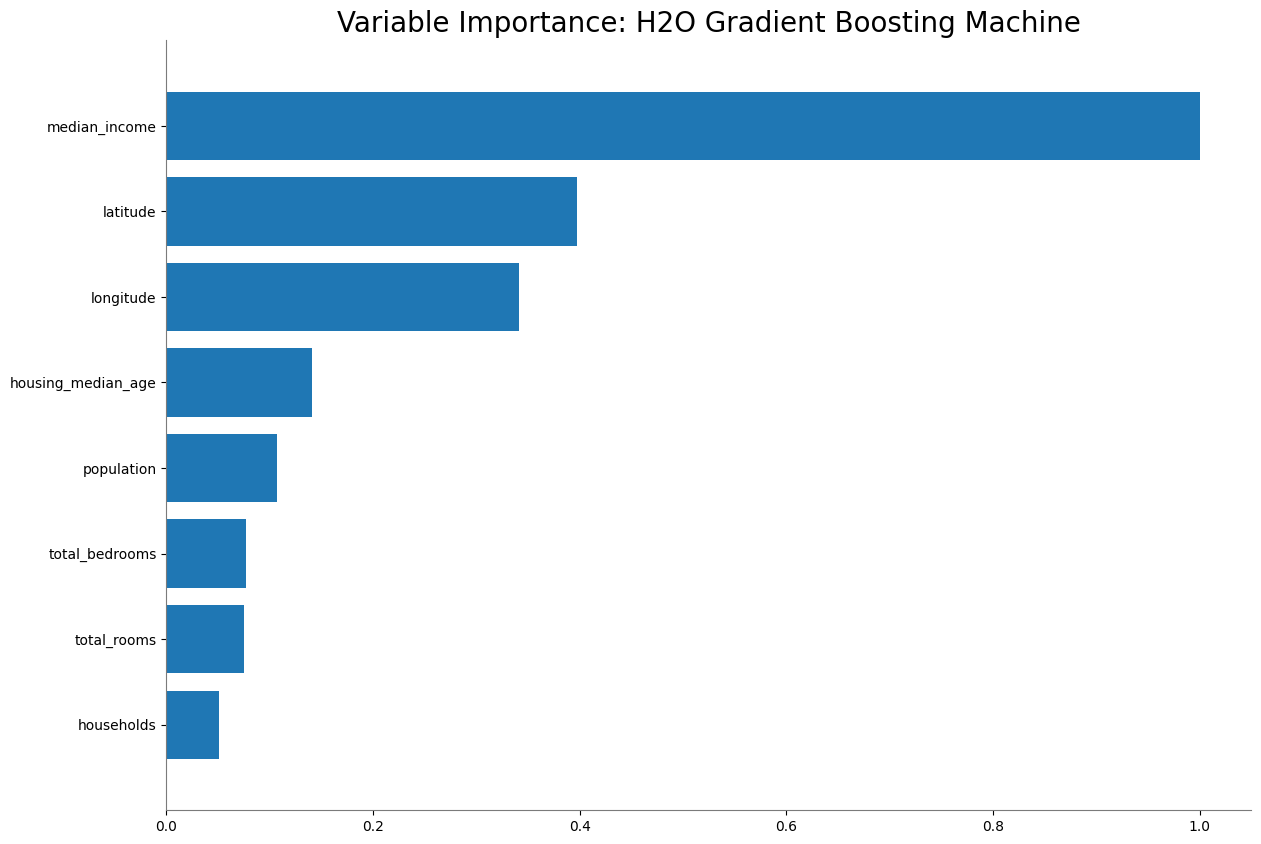

<Figure size 640x480 with 0 Axes>

In [ ]:
base_models = model.base_models
# Access one of the base models
base_model = h2o.get_model(base_models[0])
base_model.varimp_plot(num_of_features=9)

In [ ]:
model_ids = [key for key in h2o.ls()['key'] if "model" in key.lower()]
print("Model keys:", model_ids)

Model keys: ['DeepLearning_grid_1_AutoML_1_20250707_91158_model_1', 'DeepLearning_grid_1_AutoML_1_20250707_91158_model_2', 'DeepLearning_grid_3_AutoML_2_20250707_94101_model_1', 'GBM_grid_1_AutoML_1_20250707_91158_model_1', 'GBM_grid_1_AutoML_1_20250707_91158_model_2', 'GBM_grid_1_AutoML_1_20250707_91158_model_3', 'GBM_grid_1_AutoML_1_20250707_91158_model_4', 'GBM_grid_1_AutoML_1_20250707_91158_model_5', 'GBM_grid_2_AutoML_2_20250707_94101_model_1', 'GBM_grid_2_AutoML_2_20250707_94101_model_2', 'GBM_grid_2_AutoML_2_20250707_94101_model_3', 'GBM_grid_2_AutoML_2_20250707_94101_model_4', 'GBM_grid_2_AutoML_2_20250707_94101_model_5', 'StackedEnsemble_AllModels_1_AutoML_1_20250707_91158', 'StackedEnsemble_AllModels_2_AutoML_1_20250707_91158', 'StackedEnsemble_AllModels_3_AutoML_1_20250707_91158', 'XGBoost_grid_1_AutoML_1_20250707_91158_model_1', 'XGBoost_grid_1_AutoML_1_20250707_91158_model_2', 'XGBoost_grid_1_AutoML_1_20250707_91158_model_3', 'XGBoost_grid_1_AutoML_1_20250707_91158_model_4

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_ids = h2o.ls()['key']
print(model_ids)

0            AutoMLSession_Project_1@@median_house_value
1      AutoML_1_20250707_91158_training_Key_Frame__up...
2      AutoML_2_20250707_94101_training_Key_Frame__up...
3                          DRF_1_AutoML_1_20250707_91158
4                          DRF_2_AutoML_2_20250707_94101
                             ...                        
196    modelmetrics_metalearner_AUTO_StackedEnsemble_...
197    modelmetrics_metalearner_AUTO_StackedEnsemble_...
198    modelmetrics_metalearner_AUTO_StackedEnsemble_...
199                                        py_4_sid_94bd
200    transformation_8095_StackedEnsemble_AllModels_...
Name: key, Length: 201, dtype: object


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
model_path = h2o.save_model(model = model, path ='/content', force = True)